# Computational Linear Algebra: Singular Value Decomposition Homework

In the following homework we decided to explore the topic of *Singular Value Decomposition* used to device a Movie recommendation system like the one used nowdays by many streaming services.

## 1. Dataset Specifications
The dataset we decided to use is the *MovieLens Dataset* which is one of the most widely used datasets for movie recommendation tasks. Such dataset contains user ratings for movies along with metadata like movie genres, titles, and timestamps.

In particular, we considered the "MovieLens 1M Dataset", which contains 1 million ratings from 6000 users on 4000 movies. The dataset is divided into 3 main files:
- "ratings.dat": which contains all the ratings
- "users.dat": which contains all the user information
- "movies.dat": which contains all the movie information

### Ratings dataset
All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

### Users dataset
User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

### Movies dataset
Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

### 1.2 Singular Value Decomposition (SVD) - Theory

SVD is a matrix factorization technique for a matrix $A \in \mathbb{C}^{m \times n}$, expressed as:

$$
A = U \Sigma V^H
$$

where:
- $U$ is an orthogonal $m \times m$ matrix with left singular vectors,
- $\Sigma$ is a diagonal $m \times n$ matrix with non-negative singular values,
- $V$ is an orthogonal $n \times n$ matrix with right singular vectors.

Key properties:
- The columns of $U$ are eigenvectors of $A A^T$.
- The columns of $V$ are eigenvectors of $A^T A$.
- The diagonal elements of $\Sigma$ are the singular values, corresponding to the square roots of the eigenvalues of $A A^T$ or $A^T A$.
If $A \in \mathbb{R}^{m \times n}$, the decomposition becomes: $A = U \Sigma V^T$.

### Geometric Interpretation

The SVD represents a matrix transformation as a sequence of three operations:
1. **Rotation by $V^T$**: Aligns the input space with the right singular vectors.
2. **Scaling by $\Sigma$**: Scales along axes defined by the singular vectors.
3. **Rotation by $U$**: Rotates the output space to align with the left singular vectors.

This decomposition helps in understanding and visualizing linear transformations.


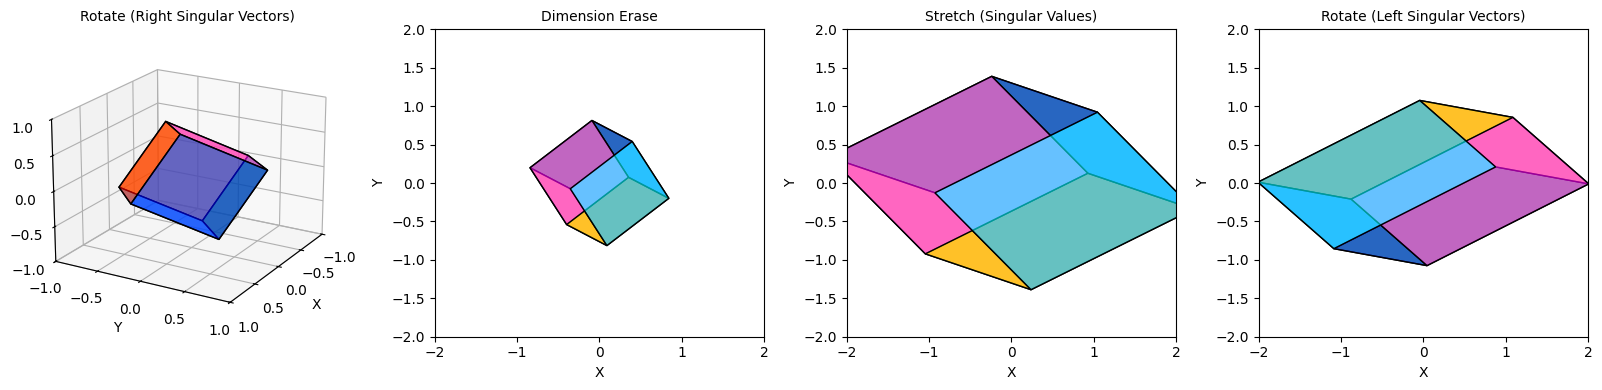

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define face colors for consistency
face_colors = [
    (1, 0, 0, 0.6),  # Red
    (0, 1, 0, 0.6),  # Green
    (0, 0, 1, 0.6),  # Blue
    (1, 1, 0, 0.6),  # Yellow
    (1, 0, 1, 0.6),  # Magenta
    (0, 1, 1, 0.6)   # Cyan
]

# Function to generate a 3D parallelepiped (unit cube)
def generate_parallelepiped():
    vertices = np.array([
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],  # Bottom face
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]   # Top face
    ])
    return vertices - 0.5  # Center the parallelepiped

# Function to apply a linear transformation to vertices
def apply_transformation(vertices, matrix):
    return np.dot(vertices, matrix.T)

# Function to plot a colored parallelepiped in 3D
def plot_parallelepiped_3d(ax, vertices, title):
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Bottom face
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Top face
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Side face
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Side face
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # Side face
        [vertices[4], vertices[7], vertices[3], vertices[0]]   # Side face
    ]
    poly3d = Poly3DCollection(faces, facecolors=face_colors, linewidths=1, edgecolors='k')
    ax.add_collection3d(poly3d)

    ax.set_title(title, fontsize=10)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.view_init(elev=20, azim=30)  # Rotate POV slightly
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

# Function to plot a transformation in 2D with colors
def plot_parallelepiped_2d(ax, vertices, title):
    ax.set_title(title, fontsize=10)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    # Get only the first two dimensions for 2D visualization
    vertices_2d = vertices[:, :2]

    # Define corresponding faces for 2D view
    faces_2d = [
        [vertices_2d[0], vertices_2d[1], vertices_2d[2], vertices_2d[3]],  # Bottom face
        [vertices_2d[4], vertices_2d[5], vertices_2d[6], vertices_2d[7]],  # Top face
        [vertices_2d[0], vertices_2d[1], vertices_2d[5], vertices_2d[4]],  # Side face
        [vertices_2d[2], vertices_2d[3], vertices_2d[7], vertices_2d[6]],  # Side face
        [vertices_2d[1], vertices_2d[2], vertices_2d[6], vertices_2d[5]],  # Side face
        [vertices_2d[4], vertices_2d[7], vertices_2d[3], vertices_2d[0]]   # Side face
    ]

    # Plot each face with the corresponding color
    for face, color in zip(faces_2d, face_colors):
        face.append(face[0])  # Close the polygon
        face = np.array(face)
        ax.fill(face[:, 0], face[:, 1], color=color, edgecolor='k', linewidth=1)

# Define an arbitrary transformation matrix (3x3 for mapping R3 to R3)
A = np.array([[1, 2, 1], [0, 1, -1], [1, 0, 1]])

# Perform SVD decomposition
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Matrices involved in the transformation
rotation1 = Vt  # First rotation (Right singular vectors)
scaling = np.diag(S)  # Scaling matrix (Singular values)
rotation2 = U  # Second rotation (Left singular vectors)

# Original parallelepiped
vertices = generate_parallelepiped()

# Apply transformations
vertices_rot1 = apply_transformation(vertices, rotation1)  # Rotate (3D)
vertices_projected = vertices_rot1[:, :2]  # Dimension Reduction (Drop Z)
vertices_stretch = apply_transformation(vertices_projected, scaling[:2, :2])  # Stretch
vertices_rot2 = apply_transformation(vertices_stretch, rotation2[:2, :2])  # Final Rotate

# Plot results: 3D rotation, dimension reduction, 2D stretch, 2D final rotation
fig = plt.figure(figsize=(16, 4))

# First plot (3D): Rotate by right singular vectors
ax1 = fig.add_subplot(141, projection='3d')
plot_parallelepiped_3d(ax1, vertices_rot1, "Rotate (Right Singular Vectors)")

# Second plot (2D): Dimension Reduction (Projection to 2D)
ax2 = fig.add_subplot(142)
plot_parallelepiped_2d(ax2, vertices_projected, "Dimension Erase")

# Third plot (2D): Stretch by singular values
ax3 = fig.add_subplot(143)
plot_parallelepiped_2d(ax3, vertices_stretch, "Stretch (Singular Values)")

# Fourth plot (2D): Rotate by left singular vectors
ax4 = fig.add_subplot(144)
plot_parallelepiped_2d(ax4, vertices_rot2, "Rotate (Left Singular Vectors)")

plt.tight_layout()
plt.show()

## 2. Dataset preparation
### 2.3 Loading the separate datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import wordcloud

# Load ratings.dat
ratings = pd.read_csv(
    'MovieLens1M/ratings.dat', 
    sep='::', 
    engine='python', 
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
    encoding='ISO-8859-1'
)

# Load movies.dat
movies = pd.read_csv(
    'MovieLens1M/movies.dat', 
    sep='::', 
    engine='python', 
    names=['MovieID', 'Title', 'Genres'],
    encoding='ISO-8859-1'
)

# Load users.dat
users = pd.read_csv(
    'MovieLens1M/users.dat', 
    sep='::', 
    engine='python', 
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='ISO-8859-1'
)

# Display the first few rows
print("Ratings:")
print(ratings.head())
print("\nMovies:")
print(movies.head())
print("\nUsers:")
print(users.head())


Ratings:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Movies:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Users:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


### 2.2 Merge DataFrames
We’ll merge the ratings, movies, and users DataFrames to create a single dataset for analysis.

In [3]:
# Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='MovieID')

# Merge the result with users
full_data = pd.merge(ratings_movies, users, on='UserID')

# Display the merged dataset
print("Merged Data:")
full_data.head()

Merged Data:


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


## 3. Preprocessing
In order to apply the SVD decomposition we need to preprocess the data in the dataset.
### 3.1 Normalize ratings
We normalize the ratings to ensure fair comparison across users.

In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize the ratings
scaler = StandardScaler()
full_data['Normalized_Rating'] = scaler.fit_transform(full_data[['Rating']])

print(f"Normalized Ratings (mean={full_data['Normalized_Rating'].mean()}, std={full_data['Normalized_Rating'].std()}):")
full_data[['Rating', 'Normalized_Rating']].head()

Normalized Ratings (mean=-4.7489856505553035e-17, std=1.000000499895897):


,Rating,Normalized_Rating
0,5,1.269747
1,3,-0.520601
2,3,-0.520601
3,4,0.374573
4,5,1.269747


### 4. Data Matrix
In order to apply SVD we transform the dataset into a  user-item matrix where rows are users, columns are movies, and values are ratings.

In [5]:
from scipy.sparse.linalg import svds
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, leaves_list

# Handle the missing values by filling with the mean rating for each user
user_item_matrix = full_data.pivot(index='UserID', columns='MovieID', values='Normalized_Rating')

Since user-movie rating matrices are inherently sparse, handling missing values properly is crucial. We've observed that in general users tend to rate movies based on personal biases. Therefore, we decided to handle the missing values by user mean imputation to preserve their individual rating tendencies.

In [6]:
imp = SimpleImputer(strategy='mean')
user_item_matrix = pd.DataFrame(imp.fit_transform(user_item_matrix.T).T, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Convert to numpy array
matrix = user_item_matrix.values

# Display the matrix shape
print("User-Item Matrix Shape:", matrix.shape)

User-Item Matrix Shape: (6040, 3706)


## 5. Perform SVD
We preform Singular Value Decomposition on the user-item matrix.

In [7]:
import numpy as np

def bidiagonal(A):
    m, n = A.shape
    B = A.copy()  # Make a copy of A for modification
    P = np.eye(m)  # Initialize the orthogonal matrix P
    H = np.eye(n)  # Initialize the orthogonal matrix H
    
    for k in range(n):
        # Construct Householder vector for column k
        a = B[k:, k].copy()
        a[0] += np.sign(a[0]) * np.linalg.norm(a)
        P_tilde = np.eye(m)
        P_tilde[k:, k:] -= 2 * np.outer(a, a) / np.dot(a, a)  # Outer product instead of dot product
        
        # Update matrix B and P
        B = P_tilde @ B
        P = P_tilde @ P
        
        if k < n - 1:  # Only need to reflect in the row direction for k < n-1
            # Construct Householder vector for row k
            b = B[k, k+1:].copy()
            b[0] += np.sign(b[0]) * np.linalg.norm(b)
            H_tilde = np.eye(n)
            H_tilde[k+1:, k+1:] -= 2 * np.outer(b, b) / np.dot(b, b)  # Outer product instead of dot product
            
            # Update matrix B and H
            B = B @ H_tilde
            H = H @ H_tilde
    
    return P, B, H


In [8]:
from scipy.linalg import qr
from numpy.linalg import eig
def my_svd(A):
    _, B , H = bidiagonal(A)
    
    # Compute eigenvalues and eigenvectors of B^T B
    eigvals, Q_tilde = eig(np.dot(B.T, B))
    
    # Sort the eigenvalues in descending order and order Q_tilde accordingly
    sorted_indices = np.argsort(-eigvals)  # Sort in descending order
    eigvals = np.sqrt(np.abs(eigvals[sorted_indices]))  # Singular values (square root of eigenvalues)
    Q_tilde = Q_tilde[:, sorted_indices]
    
    # Compute the right singular vectors
    V = Q_tilde
    
    # Compute the left singular vectors
    Q = H @ Q_tilde
    
    # Construct the diagonal matrix S with singular values
    S = np.diag(eigvals)
    
    # Compute the C matrix (A @ V)
    C = A @ V
    
    # Perform QR decomposition to obtain U and R
    U, R, P = qr(C, mode='economic', pivoting=True)
    
    # Ensure that U, S, and V are correct
    V = V @ P
    S = R
    
    return U, S, V

In [9]:
A = np.array([[1,2,3], [4,5,6], [7,8,7], [4,2,3]])

In [10]:
U, S, V = my_svd(A)
U@S@V.T

array([-1.72082795, -0.28251108,  4.45856543,  1.36415016])

In [11]:
U,S, V

(array([[-0.16912369, -0.67383391, -0.01584365],
        [-0.48961621, -0.57566278,  0.03921623],
        [-0.78422289,  0.41591354, -0.41659194],
        [-0.3415664 ,  0.20390232,  0.90810915]]),
 array([[14.43820248, -7.38259038,  3.44331543],
        [ 0.        , -1.98527771,  0.82138783],
        [ 0.        ,  0.        ,  1.60101275]]),
 array([-1.12435938, -1.89584641, -0.37627433]))

### SVD using Deflation Method

In [12]:
def svd_with_deflation(A, num_singular_values=1, maxIter=100, relTol=1e-6):

    # Step 1: compute A^TA
    ATA = np.dot(A.T, A)
    A_current = ATA.copy()

    singular_values = []
    right_singular_vectors = []
    Pmatrices = np.full((num_singular_values, ATA.shape[0], ATA.shape[0]), np.eye(ATA.shape[0]))

    # Step 2: Eigenvalues computation with deflation method
    for i in range(num_singular_values):
        # Slice the current matrix for reduced dimension
        A_reduced = A_current.copy()[i:, i:]

        # Power iteration to find dominant singular value and vector
        singular_value, singular_vector = power_method(A_reduced, np.random.rand(A_reduced.shape[0]), maxIter, relTol)

        # Store the singular value
        singular_values.append(np.sqrt(singular_value))

        # Compute (singular_vector + e_i) / ||singular_vector + e_i|| to get the eigenvector of the original matrix
        singular_vector = singular_vector.reshape(-1, 1)
        e_i = np.zeros_like(singular_vector)
        e_i[0] = 1
        u = singular_vector + e_i
        
        singular_vector = singular_vector.flatten()
        if i > 0:
            # Transform the singular vector to the original space
            original_singular_vector = np.zeros(ATA.shape[0])
            original_singular_vector[i:] = singular_vector
            P_from_i = np.eye(ATA.shape[0])
            for j in range(i):
                z = i-j
                work_vector = original_singular_vector[z:]
                bj = A_current.copy()[z-1, z:]
                original_singular_vector[z-1] = (bj.T @ Pmatrices[z][z:,z:] @ work_vector)/(singular_values[i] - singular_values[z-1])
                P_from_i = Pmatrices[z] @ P_from_i
            P_from_i = Pmatrices[0] @ P_from_i
            singular_vector = P_from_i @ original_singular_vector
        right_singular_vectors.append(singular_vector)

        # Compute the P_{i+1} matrix
        Pi = np.eye(A_current.shape[0])
        Pi[i:, i:] -= 2 * np.outer(u, u.T)/(np.linalg.norm(u)**2)
        Pmatrices[i] = Pi

        # Update A_current with deflation step A_current = P_i A_current P_i^T
        A_current = Pi @ A_current @ Pi.T

    # Step 3: Store the singular values and right singular vectors
    Sigma = np.array(singular_values)
    Vt = np.array(right_singular_vectors)

    # Step 4: Compute the left singular vectors
    U = np.zeros((A.shape[0], num_singular_values))
    for i in range(num_singular_values):
        U[:, i] = A @ Vt[i, :] / Sigma[i]

    return U, np.diag(Sigma), Vt

### SVD using Shifting Method

In [13]:
def svd_with_shift(A, num_singular_values=1, maxIter=100, relTol=1e-6):

    # Step 1: compute A^TA
    ATA = np.dot(A.T, A)

    singular_values = []
    right_singular_vectors = []

    # Step 2: Eigenvalues computation with deflation method
    for _ in range(num_singular_values):
        # Power iteration to find dominant singular value and vector
        singular_value, singular_vector = power_method(ATA, np.random.rand(ATA.shape[1]), maxIter, relTol)

        # Store the singular value and vector
        singular_values.append(np.sqrt(singular_value))
        right_singular_vectors.append(singular_vector)

        # Deflation step
        ATA = ATA - singular_value * np.outer(singular_vector, singular_vector)

    # Step 3: Store the singular values and right singular vectors
    Sigma = np.array(singular_values)
    Vt = np.array(right_singular_vectors)

    # Step 4: Compute the left singular vectors
    U = np.zeros((A.shape[0], num_singular_values))
    for i in range(num_singular_values):
        U[:, i] = A @ Vt[i, :] / Sigma[i]

    return U, np.diag(Sigma), Vt

In [14]:
U, S, Vt = svds(matrix, k=10)
# Sort the singular values in descending order
sorted_indices = np.argsort(S)[::-1]  # Indices for sorting in descending order
S = S[sorted_indices]           # Sort singular values
U = U[:, sorted_indices]                # Reorder columns of U
Vt = Vt[sorted_indices, :]              # Reorder rows of V^T

### 5.2 Selecting the number of Singular Values
Singular Value Decomposition (SVD) can be used to reduce data dimensionality, since it provides the best low-rank linear approximation of a given matrix. This can be achieved considering that the magnitude of each singular value represents the "*importance*" of its relative component of the decomposition. Dimensionality reduction is achieved by selecting the largest $k$ singular values, where the choice of $k$ depends on the size and structure of the data.

Given the SVD decomposition of a matrix $A$ of size $m \times n$:

$$A = U \Sigma V^T,$$

the reduced approximation of $A$ is:

$$A_k = U_k \Sigma_k V_k^T$$

where:
- $\Sigma_k$ is a $k \times k$ matrix, obtained by keeping only the first $k$ singular values,
- $U_k$ is an $m \times k$ matrix, obtained by keeping only the first $k$ columns of $U$,
- $V_k^T$ is a $k \times n$ matrix, obtained by keeping only the first $k$ rows of $V^T$.

So, we are required to choose a value of $k$ such that we retain enough information to obtain an accurate prediction and, at the same time, we don't want to choose a value of $k$ too large which would retain too much of the original matrix, defeating the purpose of SVD-based dimensionality reduction.

Therefore, we have decided to apply an **elbow method** and choose the value of $k$ in correspondence of the point where the gain in explained variance starts diminishing. This way we can properly balance variance retention and model generalization.

In [15]:
### REAL IMPLEMENTATION WE NEED TO USE
U, Sigma, V = my_svd(matrix)

KeyboardInterrupt: 

In [13]:
# We plot the significance of the singular values
U, sigma, Vt = svd_with_shift(matrix, num_singular_values=500, maxIter=1000, relTol=1e-3)
singular_values = np.diag(sigma)

To find a reasonable value $k$ we plot the explained variance of the singular values.

In [ ]:
total_variance = np.trace(matrix.T @ matrix)  # Sum of all squared singular values
explained_variance_ratio = (singular_values**2) / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(singular_values ) + 1), cumulative_variance)
plt.ylim([0.77, 1])
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

k_optimal = 20
print(f"With k = {k_optimal} we explain at least {cumulative_variance[k_optimal-1]*100:.2f}% of the variance")

We derive that 82.3% of the total explained variance is contained in the first 20 singular values. Therefore we select k = 20.

In [ ]:
# Example SVD computation
K = 20  # Number of latent features
U1, sigma1, Vt1 = svds(matrix, k=K)  # k is the number of latent features

# Sort the singular values in descending order
sorted_indices = np.argsort(sigma1)[::-1]  # Indices for sorting in descending order
sigma1 = sigma1[sorted_indices]           # Sort singular values
U1 = U1[:, sorted_indices]                # Reorder columns of U
Vt1 = Vt1[sorted_indices, :]              # Reorder rows of V^T

# Convert sigma to a diagonal matrix
sigma1 = np.diag(sigma1)

# Print shapes for verification
print("U shape:", U1.shape)        # Should be (rows in matrix, k)
print("Sigma shape:", sigma1.shape)  # Should be (k, k)
print("Vt shape:", Vt1.shape)      # Should be (k, columns in matrix)

In [ ]:
U = U[:,:K]
sigma = sigma[:K,:K]
Vt = Vt[:K,:]
print("U shape:", U.shape)        # Should be (rows in matrix, k)
print("Sigma shape:", sigma.shape)  # Should be (k, k)
print("Vt shape:", Vt.shape)
print(f"SVD with shifting + {K} latent features has MSE: {np.mean((np.diag(sigma) - np.diag(sigma1))**2)}")

From the given decomposition we can reconstruct the original matrix and in doing so predict the missing ratings

In [ ]:
# Reconstruct the predicted matrix as A = U * sigma * Vt
predicted_matrix = np.dot(np.dot(U, sigma), Vt)

# Convert back to a DataFrame
predicted_ratings = pd.DataFrame(predicted_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

print("Predicted Ratings:")
predicted_ratings.head()

## 5.3 Recommend Movies
Based on the matrix of predictions we just computed we can recommend top-rated movies based on predicted ratings

In [18]:
from wordcloud import WordCloud

def plot_genre_wordcloud(user_id, original_data):
    # Filter the data for the given user
    user_data = original_data[original_data['UserID'] == user_id]

    # Calculate the average rating for each genre
    genre_ratings = {}
    for genres, rating in zip(user_data['Genres'], user_data['Rating']):
        for genre in genres.split('|'):
            if genre in genre_ratings:
                genre_ratings[genre].append(rating)
            else:
                genre_ratings[genre] = [rating]

    # Calculate the average rating for each genre
    avg_genre_ratings = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_ratings.items()}

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(avg_genre_ratings)

    # Plot the word cloud
    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Genre WordCloud for User {user_id}')
    plt.show()

In [19]:
def recommend_movies(user_id, predicted_ratings, original_data, num_recommendations=5):
    user_row = predicted_ratings.loc[user_id].sort_values(ascending=False)

    # Exclude movies the user has already rated
    rated_movies = original_data[original_data['UserID'] == user_id]['MovieID']
    recommendations = user_row[~user_row.index.isin(rated_movies)].head(num_recommendations)

    # Map back to movie titles and sort by predicted rating
    recommended_movies = movies[movies['MovieID'].isin(recommendations.index)]
    recommended_movies = recommended_movies.set_index('MovieID').loc[recommendations.index].reset_index()
    return recommended_movies

In [ ]:
# Recommend movies for a specific user (e.g., user_id = 1)
user_id = 2
recommended_movies = recommend_movies(user_id, predicted_ratings, full_data, num_recommendations=5)

print(f"The user {user_id} has the following tastes:")
plot_genre_wordcloud(user_id, full_data)
print("Recommended Movies for User {}:".format(user_id))
recommended_movies

## 6. Hierarchical Clustering
In order to device a more impactful procedure to predict the correct recomendations, we decided to sort the users in the user-item matrix so that the users with higher *cosine similarity* are adjacent:
$$
cos(x,y)=\frac{x\cdot y}{||x||||y||}
$$
To do so, we performed hierarchical clustering on the users and selected the subgroups produced to create such ordering

In [ ]:
# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Perform hierarchical clustering

# Use average linkage method for clustering
linkage_matrix = linkage(user_similarity, method='average')

# Get the order of users based on clustering
user_order = leaves_list(linkage_matrix)

# Reorder the user-item matrix based on the clustering
user_item_matrix = user_item_matrix.iloc[user_order]

## 7. Evaluation
//TODO: implement some MSE to evaluate our recomendations

In [ ]:
# Evaluate the model using RMSE
from sklearn.metrics import mean_squared_error

# Filter out NaN values
predicted_ratings = predicted_ratings.fillna(0)

# Calculate MSE
rmse = np.sqrt(mean_squared_error(matrix, predicted_matrix))
print("RMSE:", rmse)

# ANIME DATASET

## Import data

In [24]:
ratings = pd.read_csv(
    'anime/rating.csv', 
    sep=',', 
)

# Load movies.dat
anime = pd.read_csv(
    'anime/anime.csv', 
    usecols=['anime_id', 'name', 'genre'],
    sep=',', 
)


In [ ]:
df = pd.merge(ratings, anime, on='anime_id')

print("Merged Data:")
df.head()

In [ ]:
df.shape

## Deal with missing information

In [28]:
valid_ratings = df.loc[df['rating'] != -1, 'rating']
min_val = valid_ratings.min()
max_val = valid_ratings.max()

replacement_value = (max_val - min_val) / 2 + 1

df['rating'] = df['rating'].replace(-1, replacement_value)

## Deal with duplicates

In [ ]:
df = df.groupby(['user_id', 'anime_id'], as_index=False).agg({
    'rating': 'mean',  # Compute the mean of ratings
    'name': 'first',   # Keep the first name (since names should be identical)
    'genre': 'first'   # Keep the first genre (since genres should be identical)
})
df.shape

## Normalize the ratings

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Normalized_Rating'] = scaler.fit_transform(df[['rating']])

print(f"Normalized Ratings (mean={df['Normalized_Rating'].mean()}, std={df['Normalized_Rating'].std()}):")

In [ ]:
min_val = df['Normalized_Rating'].min()
max_val = df['Normalized_Rating'].max()
NaN_val = ((max_val - min_val) / 2)+1
user_item_matrix = df.pivot(index='user_id', columns='anime_id', values='Normalized_Rating')

matrix = user_item_matrix.values

# Display the matrix shape
print("User-Item Matrix Shape:", matrix.shape)

In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(matrix, k=500)

In [ ]:
# Compute total variance as the sum of squares of all singular values
total_variance = np.trace(matrix.T @ matrix)
explained_variance_ratio = (sigma**2) / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)
threshold = 0.995  # 99.5% of variance

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(singular_values) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=threshold, color='r', linestyle='--', label=f"Threshold at {threshold*100}% variance")
plt.grid(True)
plt.legend()
plt.show()

# Compute the optimal number of singular values to explain at least 99.5% of the variance
k_optimal = np.argmax(cumulative_variance >= threshold)+ 1
print(f"Optimal number of singular values to explain at least 99.5% of the variance: {k_optimal}")


In [ ]:
U = U[:,:K]
sigma = sigma[:K,:K]
Vt = Vt[:K,:]
print("U shape:", U.shape)        # Should be (rows in matrix, k)
print("Sigma shape:", sigma.shape)  # Should be (k, k)
print("Vt shape:", Vt.shape)
print(f"SVD with shifting + {K} latent features has MSE: {np.mean((np.diag(sigma) - np.diag(sigma1))**2)}")

In [ ]:
# Reconstruct the predicted matrix as A = U * sigma * Vt
predicted_matrix = np.dot(np.dot(U, sigma), Vt)

# Convert back to a DataFrame
predicted_ratings = pd.DataFrame(predicted_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

print("Predicted Ratings:")
predicted_ratings.head()

In [ ]:
def recommend_anime(user_id, predicted_ratings, original_data, num_recommendations=5):
    user_row = predicted_ratings.loc[user_id].sort_values(ascending=False)

    # Exclude movies the user has already rated
    rated_anime = original_data[original_data['user_id'] == user_id]['anime_id']
    recommendations = user_row[~user_row.index.isin(rated_anime)].head(num_recommendations)

    # Map back to movie titles
    recommended_anime = anime[anime['anime_id'].isin(recommendations.index)]
    return recommended_anime

# Recommend movies for a specific user (e.g., user_id = 1)
user_id = 1
recommended_anime = recommend_anime(user_id, predicted_ratings, full_data, num_recommendations=5)

print("Recommended Movies for User {}:".format(user_id))
recommended_movies

## 8. Conclusions
// TODO: write conclusions